In [3]:
# 006.FEATURE SELECTION

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df['Classes'].value_counts()

Classes
fire             131
not fire          97
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [11]:
# encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [12]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
234,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
235,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
236,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
237,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
238,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [13]:
df["Classes"].value_counts()

Classes
1    137
0    102
Name: count, dtype: int64

In [14]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [15]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [16]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
234    6.5
235    0.0
236    0.2
237    0.7
238    0.5
Name: FWI, Length: 239, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
x_train.shape,x_test.shape

((179, 11), (60, 11))

In [19]:
# feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.641783,-0.308153,-0.296168,0.672432,0.448325,0.346342,0.584180,0.423963,0.500699,0.264776
RH,-0.641783,1.000000,0.268286,0.212271,-0.619837,-0.389257,-0.207393,-0.672540,-0.332784,-0.415186,-0.411179
Ws,-0.308153,0.268286,1.000000,0.214446,-0.170996,-0.013867,0.072870,0.001026,0.018106,-0.077091,-0.205473
Rain,-0.296168,0.212271,0.214446,1.000000,-0.537003,-0.271244,-0.289736,-0.337133,-0.283302,-0.376481,-0.047533
FFMC,0.672432,-0.619837,-0.170996,-0.537003,1.000000,0.597922,0.510460,0.741852,0.585002,0.763932,0.248456
DMC,0.448325,-0.389257,-0.013867,-0.271244,0.597922,1.000000,0.880141,0.685676,0.984064,0.591706,0.206719
DC,0.346342,-0.207393,0.072870,-0.289736,0.510460,0.880141,1.000000,0.524314,0.948444,0.521804,-0.088626
ISI,0.584180,-0.672540,0.001026,-0.337133,0.741852,0.685676,0.524314,1.000000,0.644623,0.738680,0.291946
BUI,0.423963,-0.332784,0.018106,-0.283302,0.585002,0.984064,0.948444,0.644623,1.000000,0.585566,0.101382
Classes,0.500699,-0.415186,-0.077091,-0.376481,0.763932,0.591706,0.521804,0.738680,0.585566,1.000000,0.169813


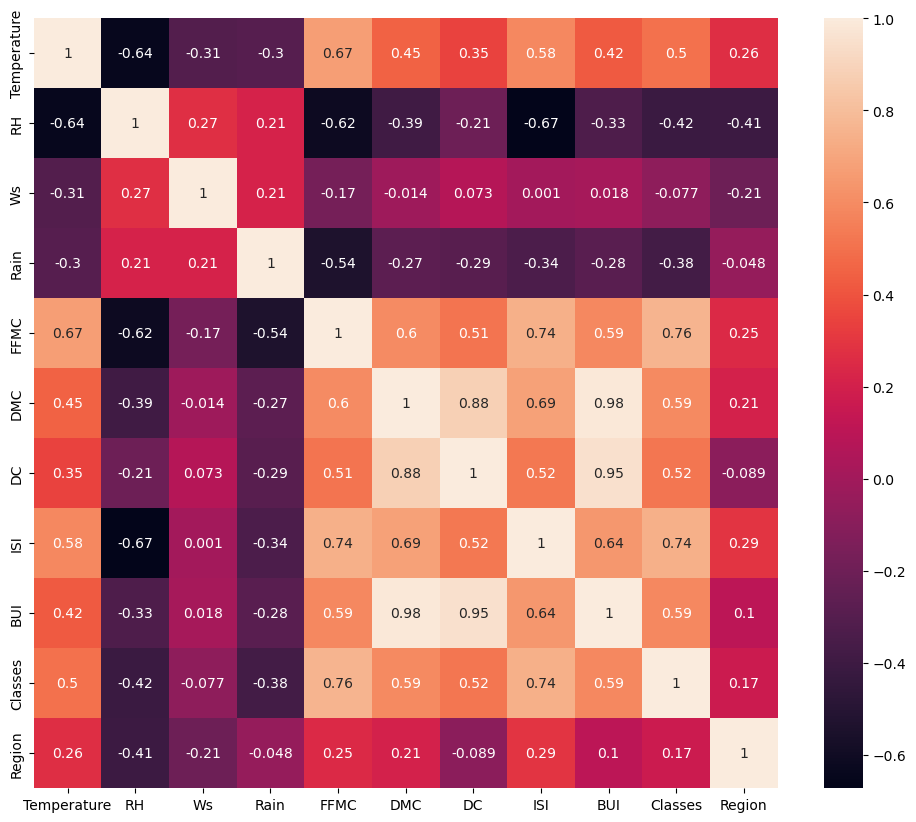

In [20]:
# check for multicollinarity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [21]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
# threshold--domain expertise
correlation(x_train,0.85)

{'BUI', 'DC'}

In [23]:
corr_features=correlation(x_train,0.85)

In [24]:
# drop features when correlation is more than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((179, 9), (60, 9))

In [25]:
# feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [26]:
x_test_scaled

array([[-0.3215736 ,  0.11434535, -0.18371403, -0.36780576,  0.61911753,
        -0.06441411,  0.21661746,  0.89893315, -0.94032469],
       [ 0.20894874, -0.55235882, -0.9144876 , -0.36780576,  0.72765309,
        -0.39895895,  0.38385201,  0.89893315, -0.94032469],
       [-2.70892415,  1.58109452, -0.18371403,  4.4472271 , -3.44734796,
        -1.11472929, -1.14514959, -1.11242977, -0.94032469],
       [-0.05631243, -0.8857109 , -1.64526118, -0.36780576,  0.81448153,
        -0.40673906,  0.47941461,  0.89893315, -0.94032469],
       [-1.91314063,  1.58109452,  2.0086067 ,  1.8251795 , -2.69483477,
        -1.06804861, -1.12125894, -1.11242977, -0.94032469],
       [ 0.73947109, -0.28567715, -2.01064796, -0.27245858,  0.01131842,
        -0.32893794, -0.76289919, -1.11242977,  1.06346245],
       [ 1.00473226, -1.2857334 ,  0.18167276, -0.36780576,  0.9447242 ,
         2.41744174,  1.60227516,  0.89893315,  1.06346245],
       [-0.3215736 ,  1.04773119,  0.91244633, -0.36780576,  0

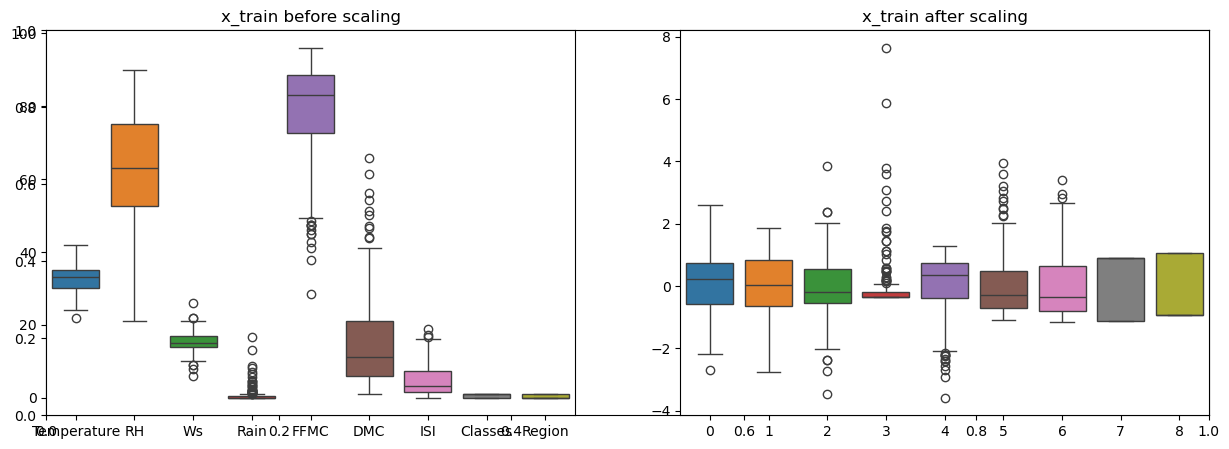

In [27]:
# box plot to understand effects of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("x_train after scaling")
plt.show()

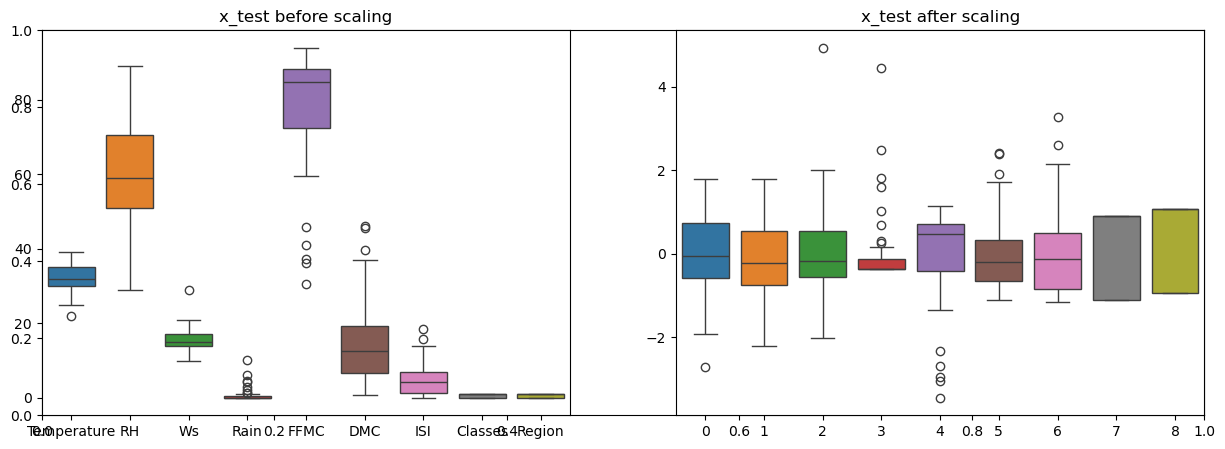

In [28]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_test)
plt.title('x_test before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_test_scaled)
plt.title("x_test after scaling")
plt.show()

In [29]:
# 007.MODEL TRAINING
# linear regression model

mean absolute error 0.6919505506951447
r2 score 0.976830035735909


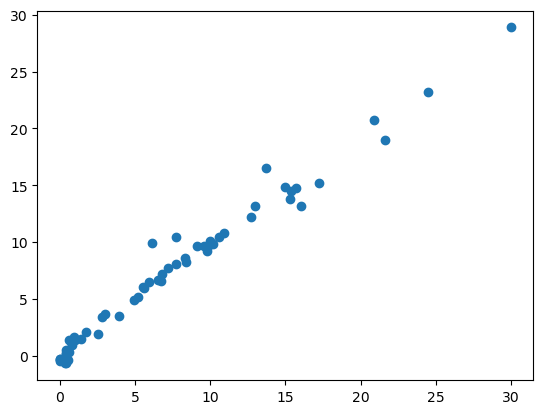

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)
plt.show()

mean absolute error 1.195087051338525
r2 score 0.9445444509229493


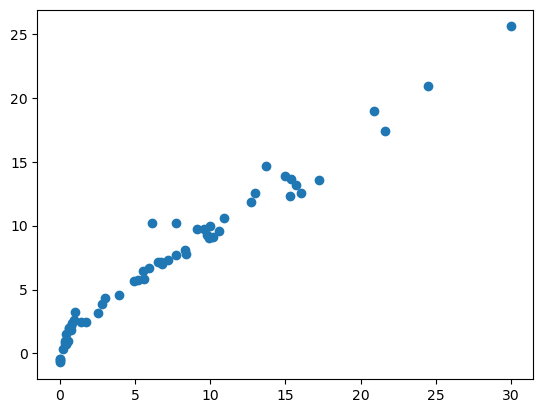

In [38]:
#  LASSO RERESSION
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
# cross validation lasso(008)
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [45]:
lassocv.alpha_

0.07452114713880721

In [46]:
lassocv.alphas_

array([6.94986712, 6.48146934, 6.04464   , 5.63725149, 5.25731961,
       4.90299386, 4.57254849, 4.26437402, 3.97696949, 3.70893505,
       3.45896524, 3.22584256, 3.00843157, 2.80567335, 2.61658036,
       2.4402316 , 2.27576816, 2.122389  , 1.97934708, 1.84594572,
       1.72153515, 1.60550945, 1.49730348, 1.39639024, 1.30227821,
       1.21450902, 1.13265517, 1.05631801, 0.98512571, 0.91873153,
       0.8568121 , 0.79906583, 0.74521147, 0.69498671, 0.64814693,
       0.604464  , 0.56372515, 0.52573196, 0.49029939, 0.45725485,
       0.4264374 , 0.39769695, 0.37089351, 0.34589652, 0.32258426,
       0.30084316, 0.28056734, 0.26165804, 0.24402316, 0.22757682,
       0.2122389 , 0.19793471, 0.18459457, 0.17215352, 0.16055094,
       0.14973035, 0.13963902, 0.13022782, 0.1214509 , 0.11326552,
       0.1056318 , 0.09851257, 0.09187315, 0.08568121, 0.07990658,
       0.07452115, 0.06949867, 0.06481469, 0.0604464 , 0.05637251,
       0.0525732 , 0.04902994, 0.04572548, 0.04264374, 0.03976

In [47]:
lassocv.mse_path_

array([[56.75894239, 30.36789859, 52.68987599, 70.98076882, 76.53790491],
       [50.22016164, 26.91525836, 46.76384528, 66.66952845, 76.53790491],
       [44.38261249, 23.89235235, 40.34221046, 60.40629929, 69.17917752],
       [39.26991873, 21.24450215, 34.83382163, 54.90533212, 61.89219979],
       [34.78992317, 18.92416996, 30.11460526, 50.07094929, 55.51876777],
       [30.86263341, 16.88983941, 26.07684307, 44.88094029, 48.2738822 ],
       [27.41805069, 15.10532384, 22.6273988 , 39.28294766, 41.98335566],
       [24.39524475, 13.53916375, 19.685382  , 34.41460851, 36.5220805 ],
       [21.74096447, 12.16383762, 17.1807817 , 30.18011588, 31.78088857],
       [19.40915025, 10.95537608, 15.05284661, 26.49806356, 27.66634609],
       [17.35925116,  9.892872  , 13.2493437 , 23.29588489, 24.09576058],
       [15.55601708,  8.95808569, 11.72472582, 20.51105633, 20.99773935],
       [13.96869025,  8.1350998 , 10.43970395, 18.08919987, 18.3102255 ],
       [12.57042677,  7.4100304 ,  9.3

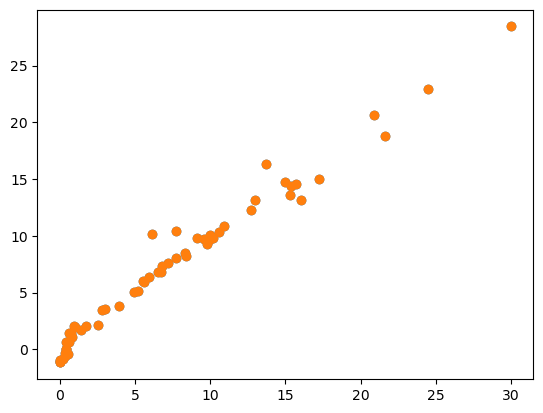

In [49]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred) 
plt.show()

mean absolute error 0.7135644863215245
r2 score 0.9761204913395213


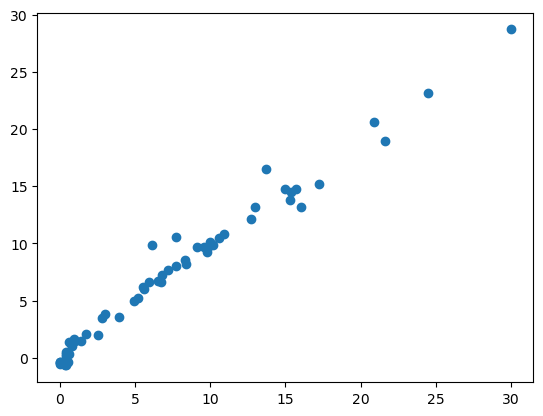

In [39]:
# ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)
plt.show()

mean absolute error 0.7992895810619071
r2 score 0.9725606226348767


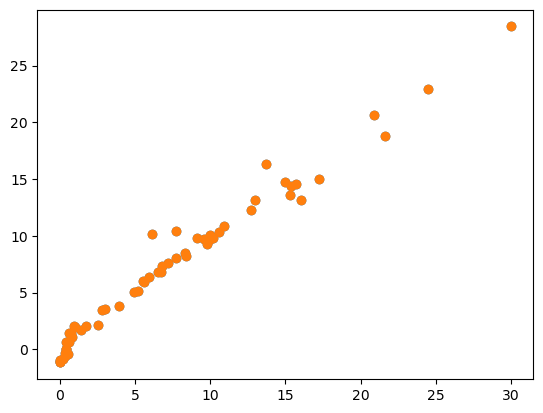

In [ ]:
# 008 
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2 score",score)
plt.show()

In [56]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

mean absolute error 1.8225783771223503
r2 score 0.8805834057974913


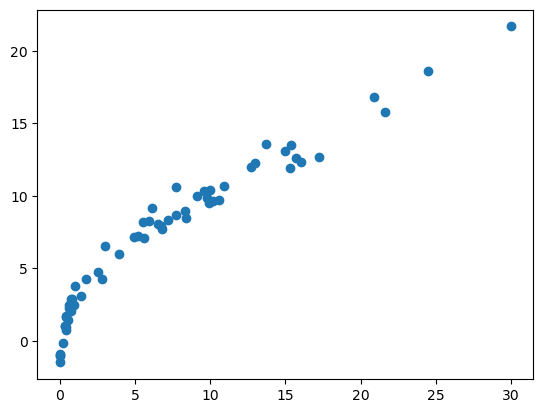

In [40]:
# elasticnet regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)
plt.show()


mean absolute error 0.8102979418716992
r2 score 0.9724398811175432


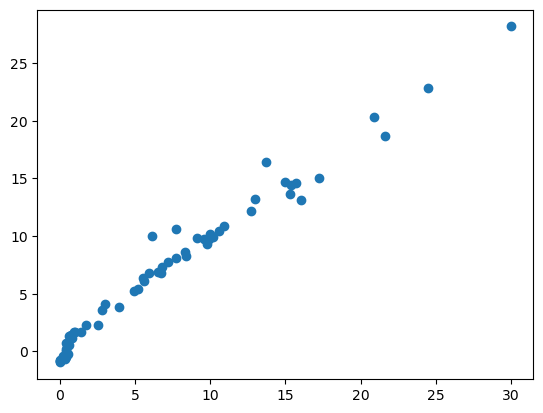

In [ ]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(  )
elasticcv.fit(x_train_scaled,y_train)
y_pred=elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2 score",score)
plt.show()

In [60]:
elasticcv.alphas_

array([13.89973425, 12.96293868, 12.08928   , 11.27450299, 10.51463922,
        9.80598773,  9.14509698,  8.52874805,  7.95393897,  7.41787011,
        6.91793049,  6.45168513,  6.01686314,  5.6113467 ,  5.23316072,
        4.8804632 ,  4.55153631,  4.244778  ,  3.95869417,  3.69189143,
        3.44307031,  3.21101889,  2.99460696,  2.79278048,  2.60455642,
        2.42901803,  2.26531035,  2.11263601,  1.97025142,  1.83746307,
        1.7136242 ,  1.59813167,  1.49042294,  1.38997342,  1.29629387,
        1.208928  ,  1.1274503 ,  1.05146392,  0.98059877,  0.9145097 ,
        0.8528748 ,  0.7953939 ,  0.74178701,  0.69179305,  0.64516851,
        0.60168631,  0.56113467,  0.52331607,  0.48804632,  0.45515363,
        0.4244778 ,  0.39586942,  0.36918914,  0.34430703,  0.32110189,
        0.2994607 ,  0.27927805,  0.26045564,  0.2429018 ,  0.22653103,
        0.2112636 ,  0.19702514,  0.18374631,  0.17136242,  0.15981317,
        0.14904229,  0.13899734,  0.12962939,  0.1208928 ,  0.11